# Final assignment: Data Analysis

## 1. Hướng dẫn chung
- Các bạn đọc câu hỏi và trả lời bằng cách tạo cell mới (nếu cần) để viết code vào theo hướng dẫn ở mỗi bài
- Code phải chạy được và ra đúng kết quả với phần test (expected result)
- Có thể sử dụng lại kết quả đã làm ở câu hỏi trước (vd: hàm đã tạo ở câu hỏi trước đó)
- Có thể import các module cần thiết nếu cần
- Điểm sẽ được chấm với trọng số như sau:
    - Tính chính xác (80%): code đúng về cả mặt logic lẫn cú pháp, đúng với mục đích của bài toán
    - Giải thuật tốt (10%): cách tiếp cận/giải thuật tốt
    - Coding style (10%): code sáng sủa và follow guiding princincples của Python (vd: sử dụng thêm khoảng trắng 2 bên phép toán, naming theo snake case, comment đoạn code phức tạp, cách import ...)

## 2. Assigments

Trước khi làm bài tập, chạy cell dưới đây để import các gói cần thiết

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Data gồm 3 files Excel

1. `data/deaths_per_100k.xlsx`: tổng số người chết vì bệnh lao (trên 100k dân số) ứng với từng năm cho từng country
1. `data/incidence_per_100k.xlsx`: ước tính tổng số cases mới mắc bệnh lao (trên 100k dân số) ứng với từng năm cho từng country
1. `data/prevalence_per_100k.xlsx`: ước tính tổng số case hiện tại mắc bệnh lao (trên 100k dân số) ứng với từng năm cho từng country

### Question 1

#### 1.1. Load data từ 3 file Excel vào 3 data frames (DFs):

- `deaths`: load từ `data/deaths_per_100k.xlsx`
- `incidence`: load từ `data/incidence_per_100k.xlsx`
- `prevalence`: load từ `data/prevalence_per_100k.xlsx`
    

In [2]:
# Load data\

deaths = pd.read_excel("data/deaths_per_100k.xlsx")
incidence = pd.read_excel("data/incidence_per_100k.xlsx")
prevalence = pd.read_excel("data/prevalence_per_100k.xlsx")

#### 1.2. Đổi tên cột đầu tiên của mỗi DF trên thành `country`

In [3]:
# Rename cols
deaths.rename(columns = {deaths.columns[0] : "country"}, inplace= True)
incidence.rename(columns = {incidence.columns[0] : "country"}, inplace= True)
prevalence.rename(columns = {prevalence.columns[0] : "country"}, inplace= True)

#### 1.3. Show 3 dòng đầu tiên cho mỗi DF trên theo đúng thứ tự. 

Từ giờ trở đi, nếu không nói gì thêm, khi câu hỏi yêu cầu tính giá trị gì đó cho cả 3 DFs thì thứ tự sẽ là `deaths`, `incidence`, và `prevalance`

<hr>

**Expected results:**

<img src="img/preview_3_DFs.png" width="600px">

In [5]:
# Show first 3 rows
display (deaths.head(3))
display (incidence.head(3))
display (prevalence.head(3))


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,50,49,48,47,47,46,46,45,43,43,41,39,36,37,34,33,31,30
1,Albania,4,4,4,4,4,5,5,5,5,5,4,4,4,4,4,4,3,3
2,Algeria,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168.0,168,168,168.0
1,Albania,25.0,24.0,25.0,26.0,26.0,27.0,27.0,28.0,28.0,27.0,25.0,23.0,23.0,22.0,21.0,20,18,17.0
2,Algeria,38.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,46.0,47.0,48.0,49.0,50.0,51.0,53.0,54,55,57.0


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Afghanistan,436,429,422,415,407,397,397,387,374,373,346,326,304,308,283,267,251,238
1,Albania,42,40,41,42,42,43,42,44,43,42,40,34,32,32,29,29,26,22
2,Algeria,45,44,44,43,43,42,43,44,45,46,48,49,50,51,52,53,55,56


### Question 2

#### 2.1. In ra số dòng, cột cho mỗi DF 

Expected: `(207, 19) (208, 19) (207, 19)`

In [6]:
# Số dòng và cột cho mỗi DF
print(deaths.shape)
print(incidence.shape)
print(prevalence.shape)


(207, 19)
(208, 19)
(207, 19)


#### 2.2. Kiểm tra số lượng unique countries trong mỗi DF

Có DF nào bị lặp countries không? Nếu có thì là DF nào và countries nào?

In [15]:
# Kiểm tra unique countries
print(f"deaths: {deaths['country'].nunique()}")
print(f"incidence: {incidence['country'].nunique()}")
print(f"prevalence: {prevalence['country'].nunique()}")


# Kiểm tra bị trùng
display(deaths.loc[deaths.duplicated(subset = 'country') == True, :])

display(incidence.loc[incidence.duplicated(subset = 'country') == True, :])

display(prevalence.loc[prevalence.duplicated(subset = 'country') == True, :])



deaths: 207
incidence: 208
prevalence: 207


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007


,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007


#### 2.3. Kiểm tra xem cả 3 DFs có chung số các countries không

Nếu sai khác thì sai khác ở những countries nào?

In [16]:
# Kiểm tra sai khác trong cột country

if deaths['country'].nunique() == incidence['country'].nunique() == prevalence['country'].nunique():
    print("Ba bảng có cùng số quốc gia")
else:
    print("Ba bảng không có cùng số quốc gia")



Ba bảng không có cùng số quốc gia


In [33]:
# deaths vs. incidence
deaths_countries = deaths['country'].tolist()

incidence.loc[incidence['country'].isin(deaths_countries) == False, :]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
119,Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,32,NaN


In [37]:
# deaths vs. prevalence
prevalence_countries = prevalence['country'].tolist()

deaths.loc[deaths['country'].isin(prevalence_countries) == False, :]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007


In [35]:
# incidence vs. prevalance
prevalence_countries = prevalence['country'].tolist()

incidence.loc[incidence['country'].isin(prevalence_countries) == False, :]

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
119,Montenegro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,32,NaN


### Question 3

#### 3.1. Đổi 3 DFs trên từ dạng wide sang long

Ghi đè luôn lên tên biến cũ, không tạo DFs mới, kết quả gồm 3 cột như sau cho mỗi DF:

- `deaths`: `country`, `year`, `deaths`
- `incidence`: `country`, `year`, `incidence`
- `prevalance`: `country`, `year`, `prevalance`

In [78]:
# Reshape data
deaths_long = deaths.melt(id_vars=["country"],
        value_vars=deaths.columns.tolist()[1:],
        var_name="year",
        value_name="deaths"
           )

incidence_long = incidence.melt(id_vars=["country"],
        value_vars = incidence.columns.tolist()[1:],
        var_name="year",
        value_name="incidence"
           )

prevalence_long = prevalence.melt(id_vars=["country"],
        value_vars = prevalence.columns.tolist()[1:],
        var_name="year",
        value_name="prevalence"
           )

#### 3.2. In ra 3 dòng đầu tiên cho mỗi DF

**Expected:**

<img src="img/preview_3_DFs_long.PNG" width="200px">

In [79]:
# Preview first 3 rows 
display(deaths_long.head(3))
display(incidence_long.head(3))
display(prevalence_long.head(3))

,country,year,deaths
0,Afghanistan,1990,50
1,Albania,1990,4
2,Algeria,1990,2


,country,year,incidence
0,Afghanistan,1990,168.0
1,Albania,1990,25.0
2,Algeria,1990,38.0


,country,year,prevalence
0,Afghanistan,1990,436
1,Albania,1990,42
2,Algeria,1990,45


#### 3.3. In ra shape của 3 DFs mới 

Expected: `(3726, 3) (3744, 3) (3726, 3)`

In [80]:
# Check shape
print (f"{deaths_long.shape} {incidence_long.shape} {prevalence_long.shape}")

(3726, 3) (3744, 3) (3726, 3)


### Question 4

#### 4.1. Tính tổng số deaths cho từng country overtime

Show ra top 5 nước có total deaths cao nhất

Expected:

<img src="img/top_5_total_deaths.png" width="150px">

In [122]:
# Top 5 total deaths
deaths_long.groupby("country").agg(
                                {'deaths': 'sum'}
                                ).reset_index().nlargest(5,'deaths')
                            

,country,deaths
174,Swaziland,3999
206,Zimbabwe,3791
205,Zambia,3445
169,South Africa,2873
53,Djibouti,2217


#### 4.2. Plot deaths overtime cho top 5 countries ở 4.1

Expected:

<img src="img/top_5_total_deaths_plot.png" width="500px">

In [88]:
deaths_long['year'] = pd.to_datetime(deaths_long['year'], format= '%Y')

In [89]:
deaths_long.dtypes

country            object
year       datetime64[ns]
deaths              int64
dtype: object

In [90]:
# Prepare data
top_5_countries = deaths_long.groupby("country")["deaths"].sum()\
                                .reset_index().nlargest(5, "deaths")\
                                ["country"].tolist()

cond = deaths_long["country"].isin(top_5_countries)

plot_data = deaths_long.loc[cond , :]

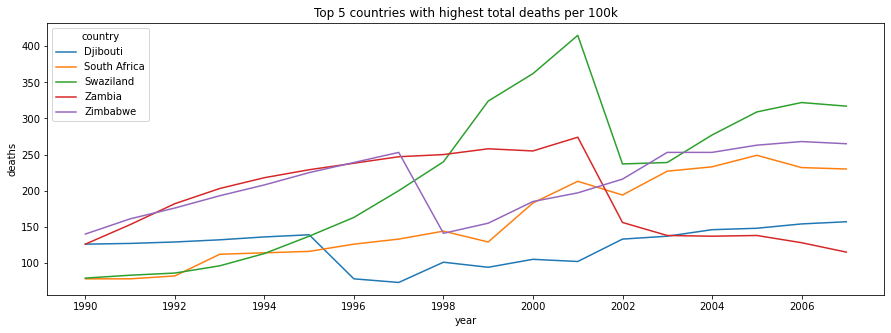

In [92]:
# Plot
fig, ax = plt.subplots(figsize = (15,5))

sns.lineplot(
            x = "year",
            y = "deaths",
            hue = "country",
            data = plot_data,
            ax = ax
            )

ax.set_title('Top 5 countries with highest total deaths per 100k')

plt.show()

#### 4.3. Lập bảng thống kê mô tả cho deaths của top 5 countries trên

Thống kê số lượng, mean, standard deviation, min, q1, median, q2, max của cột `deaths` over time (18 years).

Expected:

<img src="img/top_5_total_deaths_summary.png" width="500px">

In [94]:
# Summary stats
plot_data.groupby("country")["deaths"].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Djibouti,18.0,123.166667,25.144874,73.0,102.75,130.5,138.50,157.0
South Africa,18.0,159.611111,60.051095,78.0,114.50,138.5,223.50,249.0
Swaziland,18.0,222.166667,107.079547,79.0,119.00,238.0,315.00,415.0
Zambia,18.0,191.388889,55.236538,115.0,138.00,192.5,244.75,274.0
Zimbabwe,18.0,210.611111,44.172308,140.0,178.25,212.0,253.00,268.0


#### 4.4. Vẽ boxplots cho top 5 countries trên

Expected:

<img src="img/top_5_total_deaths_boxplot.png" width="300px">

Text(0.5, 1.0, 'Top 5 countries with highest total deaths per 100k')

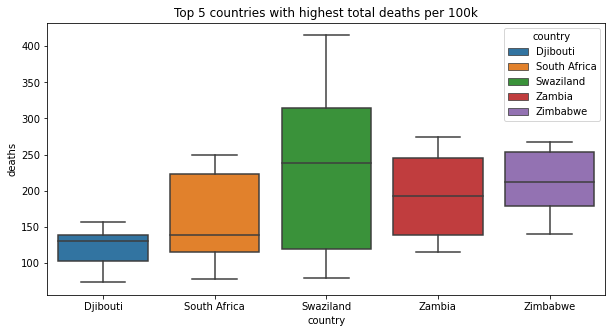

In [101]:
# Plot
fig, ax1 = plt.subplots(figsize = (10,5))

sns.boxplot(
            x = "country",
            y = "deaths",
            hue = "country",
            data = plot_data,
            ax = ax1,
            dodge= False
            )

ax1.set_title('Top 5 countries with highest total deaths per 100k')

### Question 5

#### 5.1. Lọc prevalence data từ năm 1997 đến 2007 cho tất cả countries lưu vào biến `prevalence_97_07`

1. Nhớ reset index với option `drop=True`
2. Data frame này có bao nhiêu rows? (Expected: 2277)

In [135]:
# Filter data
prevalence_97_07_cond = (prevalence_long['year'] >= 1997) & (prevalence_long['year'] <= 2007)

prevalence_97_07 = prevalence_long.loc[prevalence_97_07_cond, :].copy().reset_index(drop = True)

In [136]:
prevalence_97_07

,country,year,prevalence
0,Afghanistan,1997,387
1,Albania,1997,44
2,Algeria,1997,44
3,American Samoa,1997,25
4,Andorra,1997,23
...,...,...,...
2272,Wallis et Futuna,2007,25
2273,West Bank and Gaza,2007,31
2274,Yemen,2007,130
2275,Zambia,2007,387


#### 5.2. Dùng `prevalence_97_07`, group by country và tính average prevalence

Sắp xếp country theo thứ tự average prevalence từ cao xuống thấp

<img src="img/prevalence_97_07_avg.png" width="200px">

In [137]:
# Compute avg prevalence for each country
prevalence_97_07.groupby("country")["prevalence"].mean().reset_index().sort_values('prevalence',ascending = False)

,country,prevalence
53,Djibouti,888.454545
163,Sierra Leone,749.090909
32,Cambodia,726.000000
174,Swaziland,717.090909
182,Togo,686.545455
...,...,...
16,Barbados,4.272727
175,Sweden,4.090909
195,United States of America,3.818182
82,Iceland,2.727273


#### 5.3. Plot bar chart cho top 20 countries có avg prevalence cao nhất

Expected:

<img src="img/top_20_avg_prevalence.png" width="500px">

In [164]:
# Prepare data
top_20_avg_prevalence = prevalence_long.groupby("country")["prevalence"].mean()\
                                        .reset_index().nlargest(20, "prevalence")\
                                        ["country"].tolist()

prevalence_plot_data = prevalence_long.loc[prevalence_long['country'].isin(top_20_avg_prevalence) == True, :]                               

In [165]:
prevalence_plot_data

,country,year,prevalence
15,Bangladesh,1990,639
22,Bhutan,1990,924
32,Cambodia,1990,928
51,"Korea, Dem. Rep.",1990,841
52,"Congo, Dem. Rep.",1990,275
...,...,...,...
3692,Swaziland,2007,812
3699,Timor-Leste,2007,378
3700,Togo,2007,750
3724,Zambia,2007,387


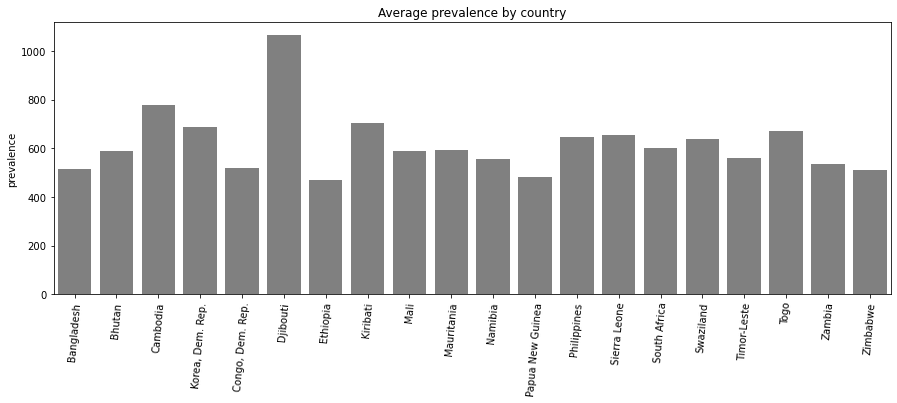

In [170]:
# Plot
fig, ax2 = plt.subplots(figsize = (15,5))
sns.color_palette("Set2")
sns.barplot(
            x = "country",
            y = "prevalence",
            color = 'grey',
            data = prevalence_plot_data,
            ax = ax2,
            ci = None
            )

ax2.set_title('Average prevalence by country')
xticks = prevalence_plot_data["country"].unique().tolist()
ax2.set_xticklabels(xticks, rotation=85)
ax2.set_xlabel("")

plt.show()